In [ ]:
# default_exp random_sim01


In [ ]:
#export
import matplotlib
import matplotlib.pyplot as plt

plt.ion()
import time
import numpy as np
import pandas as pd
import xarray as xr
import xarray.plot as xrp
import scipy.optimize
import scipy.stats
import scipy.special
from matplotlib.pyplot import plot, imshow, tight_layout, xlabel, ylabel, title, subplot, subplot2grid, grid, legend, figure, gcf, xlim, ylim


In [ ]:
#export
_code_git_version = "208fe8425e7e1ebb2ecec672595a5d51a20a8aeb"
_code_repository = "https://github.com/plops/cl-py-generator/tree/master//example/65_gaussian_variance_mse/source/01_random_sim.ipynb"
_code_generation_time = "21:35:04 of Sunday, 2021-12-05 (GMT+1)"
start_time = time.time()
debug = True


In [ ]:
#export
def gen_noise(n=100, repeats=300, loc=0, scale=1):
    a = np.random.normal(loc=loc, scale=scale, size=[repeats, n])
    return xr.DataArray(data=a,
                        dims=["repeats", "n"],
                        coords=dict(repeats=np.arange(repeats),
                                    n=np.arange(n)),
                        attrs=dict(description="normal noise",
                                   loc=loc,
                                   scale=scale))


q = gen_noise()
q


In [ ]:
# look at numerical stability of gamma function calculation
# without logarithm the gamma function stops working at around n=350
n = np.arange(1, 320)
tn = ((scipy.special.gamma(((n) / (2)))) / (scipy.special.gamma(
    ((((n) - (1))) / (2)))))
tn_ = np.exp(((scipy.special.gammaln(((n) / (2)))) - (scipy.special.gammaln(
    ((((n) - (1))) / (2))))))
plot(n, tn, label="gamma")
plot(n, tn_, label="exp gammaln")
xlabel("n")
legend()
grid()
figure()
plot(n, np.abs(((tn) - (tn_))), label="residual gamma-exp gammaln")
xlabel("n")
legend()
grid()


<ipython-input-25-99e20ae31210>:76: RuntimeWarning: divide by zero encountered in true_divide
  ((((((n) * (C))) / (((-2) * (((std)**(2))))))) +
<ipython-input-25-99e20ae31210>:78: RuntimeWarning: divide by zero encountered in log
  (((-1) * (n) * (np.log(std)))) + (((((((((n) - (1))) / (2))) * (np.log(
<ipython-input-25-99e20ae31210>:76: RuntimeWarning: invalid value encountered in add
  ((((((n) * (C))) / (((-2) * (((std)**(2))))))) +


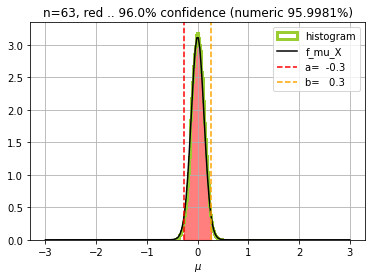

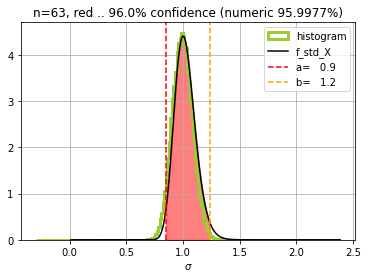

In [25]:
#export
n = 63
repeats = 100_000
xbar = (0.)
C = (1.0)
sC = np.sqrt(C)
q = gen_noise(n=n, repeats=repeats, loc=xbar, scale=sC)
tn = np.exp(((scipy.special.gammaln(((n) / (2)))) - (scipy.special.gammaln(
    ((((n) - (1))) / (2))))))
log = False
# marginal distributions for mean
# confidence interval alpha x 100 percent
alpha = (0.960)
da = ((np.sqrt(((C) / (((n) - (1)))))) * (scipy.stats.t.ppf(
    (((0.50)) * (((1) + (alpha)))), ((n) - (1)))))
db = da
a = ((xbar) - (da))
b = ((xbar) + (db))
var_lo = ((-3) * (sC))
var_hi = ((3) * (sC))
var = np.linspace(((xbar) + (var_lo)), ((xbar) + (var_hi)), 200)
mu = var
f_mu_X = ((((tn) / (np.sqrt(((np.pi) * (C)))))) * (np.power(
    ((1) + (((((((mu) - (xbar)))**(2))) / (C)))), ((n) / (-2)))))
figure()
# plot histogram
plt.hist(q.mean(dim="n").values,
         bins=np.linspace(((a) - (((3) * (((b) - (a)))))),
                          ((b) + (((3) * (((b) - (a)))))), 200),
         density=True,
         histtype="step",
         color="yellowgreen",
         linewidth=3,
         label="histogram",
         log=log)
xlabel("$\mu$")
if (log):
    plt.semilogy(var, f_mu_X, color="k", label="f_mu_X")
else:
    plot(var, f_mu_X, color="k", label="f_mu_X")
plt.axvline(a,
            color="r",
            linestyle="dashed",
            label="a={num:6.{precision}f}".format(
                num=a, precision=int(((-1) * (np.floor(np.log10(da)))))))
plt.axvline(b,
            color="orange",
            linestyle="dashed",
            label="b={num:6.{precision}f}".format(
                num=b, precision=int(((-1) * (np.floor(np.log10(db)))))))
# fill the confidence interval
var_ab = np.linspace(a, b, 120)
y_fill = ((((tn) / (np.sqrt(((np.pi) * (C)))))) * (np.power(
    ((1) + (((((((var_ab) - (xbar)))**(2))) / (C)))), ((n) / (-2)))))
plt.fill_between(var_ab, 0, y_fill, color="red", alpha=(0.50))
title("n={}, red .. {:.1f}% confidence (numeric {:6.4f}%)".format(
    n, ((100) * (alpha)), ((100) * (np.trapz(y_fill, var_ab)))))
if (log):
    ylim((1.00e-6), 10)
grid()
legend()
# marginal distributions for standard-deviation
# confidence interval alpha x 100 percent
alpha = (0.960)
arg0 = np.sqrt(((((n) * (C))) / (2)))
c_invcdf_gengamma = -2
# median as center point
a = ((arg0) * (scipy.stats.gengamma.ppf(
    ((((1) - (alpha))) / (2)), ((((n) - (1))) / (2)), c_invcdf_gengamma)))
b = ((arg0) * (scipy.stats.gengamma.ppf(
    ((((1) + (alpha))) / (2)), ((((n) - (1))) / (2)), c_invcdf_gengamma)))
var = np.linspace(np.maximum(0, ((a) - (((3) * (((b) - (a))))))),
                  ((b) + (((3) * (((b) - (a)))))), 200)
std = var
f_std_X = ((((2) * (np.exp(
    ((((((n) * (C))) / (((-2) * (((std)**(2))))))) +
     (((-1) * (scipy.special.gammaln(((((n) - (1))) / (2)))))) +
     (((-1) * (n) * (np.log(std)))) + (((((((((n) - (1))) / (2))) * (np.log(
         ((n) * (C)))))) - (((((((n) - (1))) / (2))) * (np.log(2))))))))))))
figure()
# plot histogram
plt.hist(((((tn) / (((n) - (1))))) * (np.sqrt(
    ((2) * (((((q) - (q.mean(dim="n"))))**(2)).sum(dim="n")))))).values,
         bins=np.linspace(((a) - (((3) * (((b) - (a)))))),
                          ((b) + (((3) * (((b) - (a)))))), 200),
         density=True,
         histtype="step",
         color="yellowgreen",
         linewidth=3,
         label="histogram",
         log=log)
xlabel("$\sigma$")
if (log):
    plt.semilogy(var, f_std_X, color="k", label="f_std_X")
else:
    plot(var, f_std_X, color="k", label="f_std_X")
plt.axvline(a,
            color="r",
            linestyle="dashed",
            label="a={num:6.{precision}f}".format(
                num=a, precision=int(((-1) * (np.floor(np.log10(da)))))))
plt.axvline(b,
            color="orange",
            linestyle="dashed",
            label="b={num:6.{precision}f}".format(
                num=b, precision=int(((-1) * (np.floor(np.log10(db)))))))
# fill the confidence interval
var_ab = np.linspace(a, b, 120)
y_fill = ((((2) * (np.exp(
    ((((((n) * (C))) / (((-2) * (((var_ab)**(2))))))) +
     (((-1) * (scipy.special.gammaln(((((n) - (1))) / (2)))))) +
     (((-1) * (n) * (np.log(var_ab)))) + (((((((((n) - (1))) / (2))) * (np.log(
         ((n) * (C)))))) - (((((((n) - (1))) / (2))) * (np.log(2))))))))))))
plt.fill_between(var_ab, 0, y_fill, color="red", alpha=(0.50))
title("n={}, red .. {:.1f}% confidence (numeric {:6.4f}%)".format(
    n, ((100) * (alpha)), ((100) * (np.trapz(y_fill, var_ab)))))
if (log):
    ylim((1.00e-6), 10)
grid()
legend()
